# **Analisis de Informacion de IQ**
Dataset aporte de kaggle.


In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/BBDD/gifted.csv"
import pandas as pd
df = pd.read_csv(path)

Mounted at /content/drive


In [2]:
# Información de columnas, tipos de datos y cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   score     36 non-null     int64  
 1   fatheriq  36 non-null     int64  
 2   motheriq  36 non-null     int64  
 3   speak     36 non-null     int64  
 4   count     36 non-null     int64  
 5   read      36 non-null     float64
 6   edutv     36 non-null     float64
 7   cartoons  36 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 2.4 KB


In [3]:
# Muestra media, desviación estándar, percentiles, etc.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,36.0,159.138889,4.630043,150.00,155.0000,159.0,162.00,169.0
fatheriq,36.0,114.777778,3.481470,110.00,112.0000,115.0,116.25,126.0
motheriq,36.0,118.166667,6.504943,101.00,113.7500,118.0,122.25,131.0
speak,36.0,18.000000,3.224903,10.00,17.0000,18.0,20.00,23.0
count,36.0,30.694444,4.314887,21.00,28.0000,31.0,34.25,39.0
read,36.0,2.136111,0.205847,1.70,2.0000,2.2,2.30,2.5
edutv,36.0,1.958333,0.559017,0.75,1.7500,2.0,2.25,3.0
cartoons,36.0,3.062500,0.627851,1.75,2.6875,3.0,3.50,4.5


In [4]:
# Suma los valores nulos por columna
df.isnull().sum()

,0
score,0
fatheriq,0
motheriq,0
speak,0
count,0
read,0
edutv,0
cartoons,0


In [5]:
# Cuenta valores únicos por columna
df.nunique()

,0
score,15
fatheriq,13
motheriq,18
speak,11
count,16
read,9
edutv,10
cartoons,11


# **Visualizaciones**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

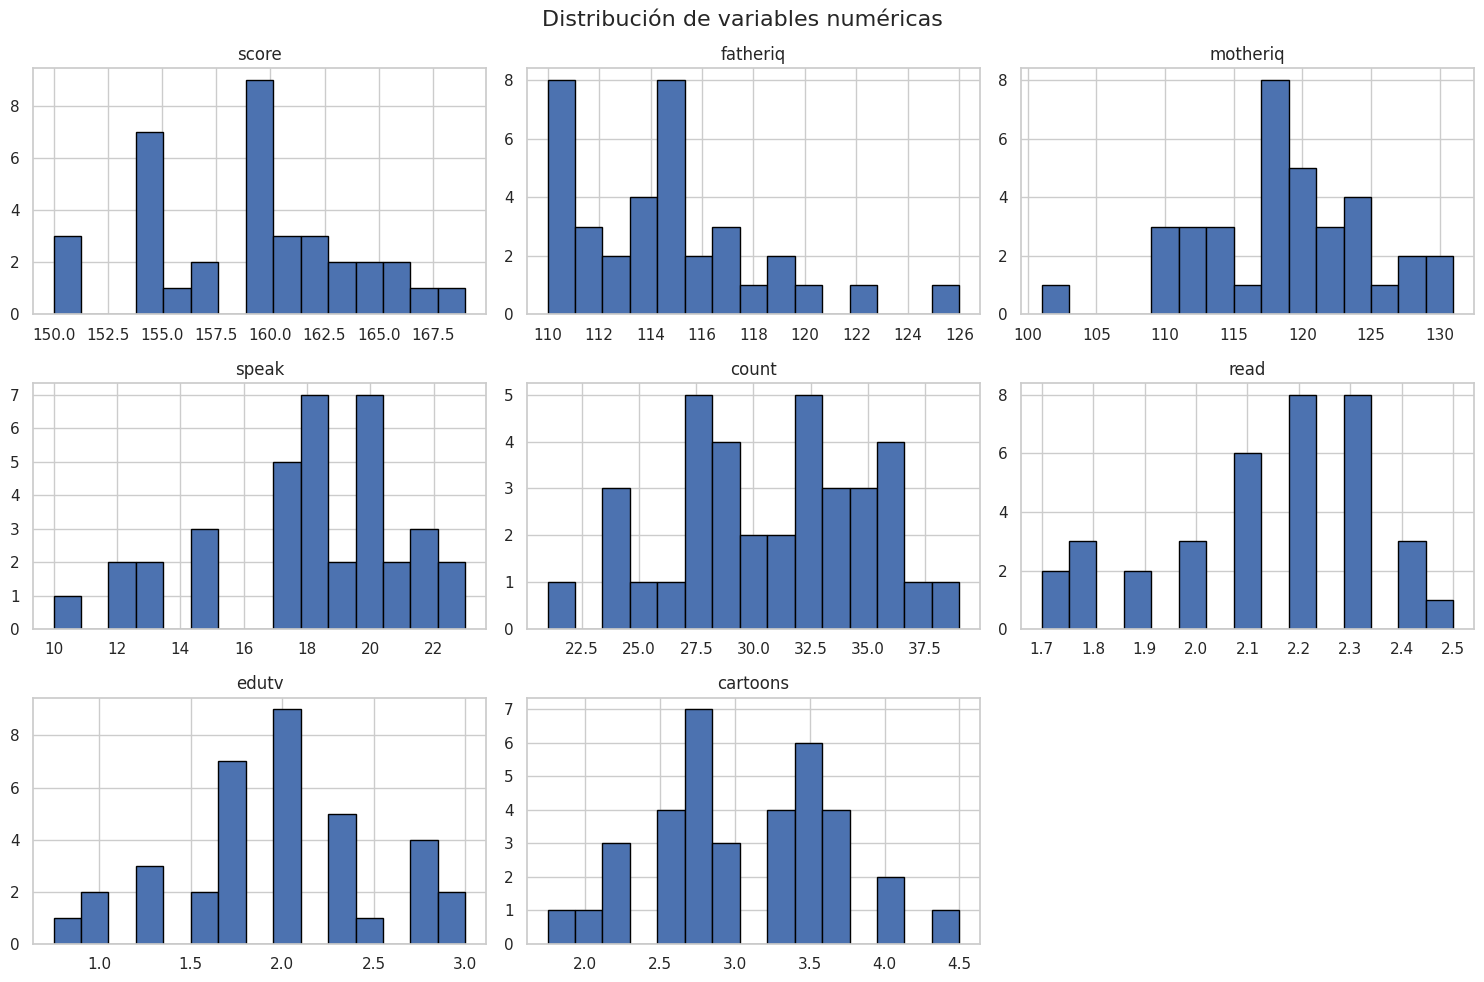

In [7]:
df.hist(bins=15, edgecolor='black', figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

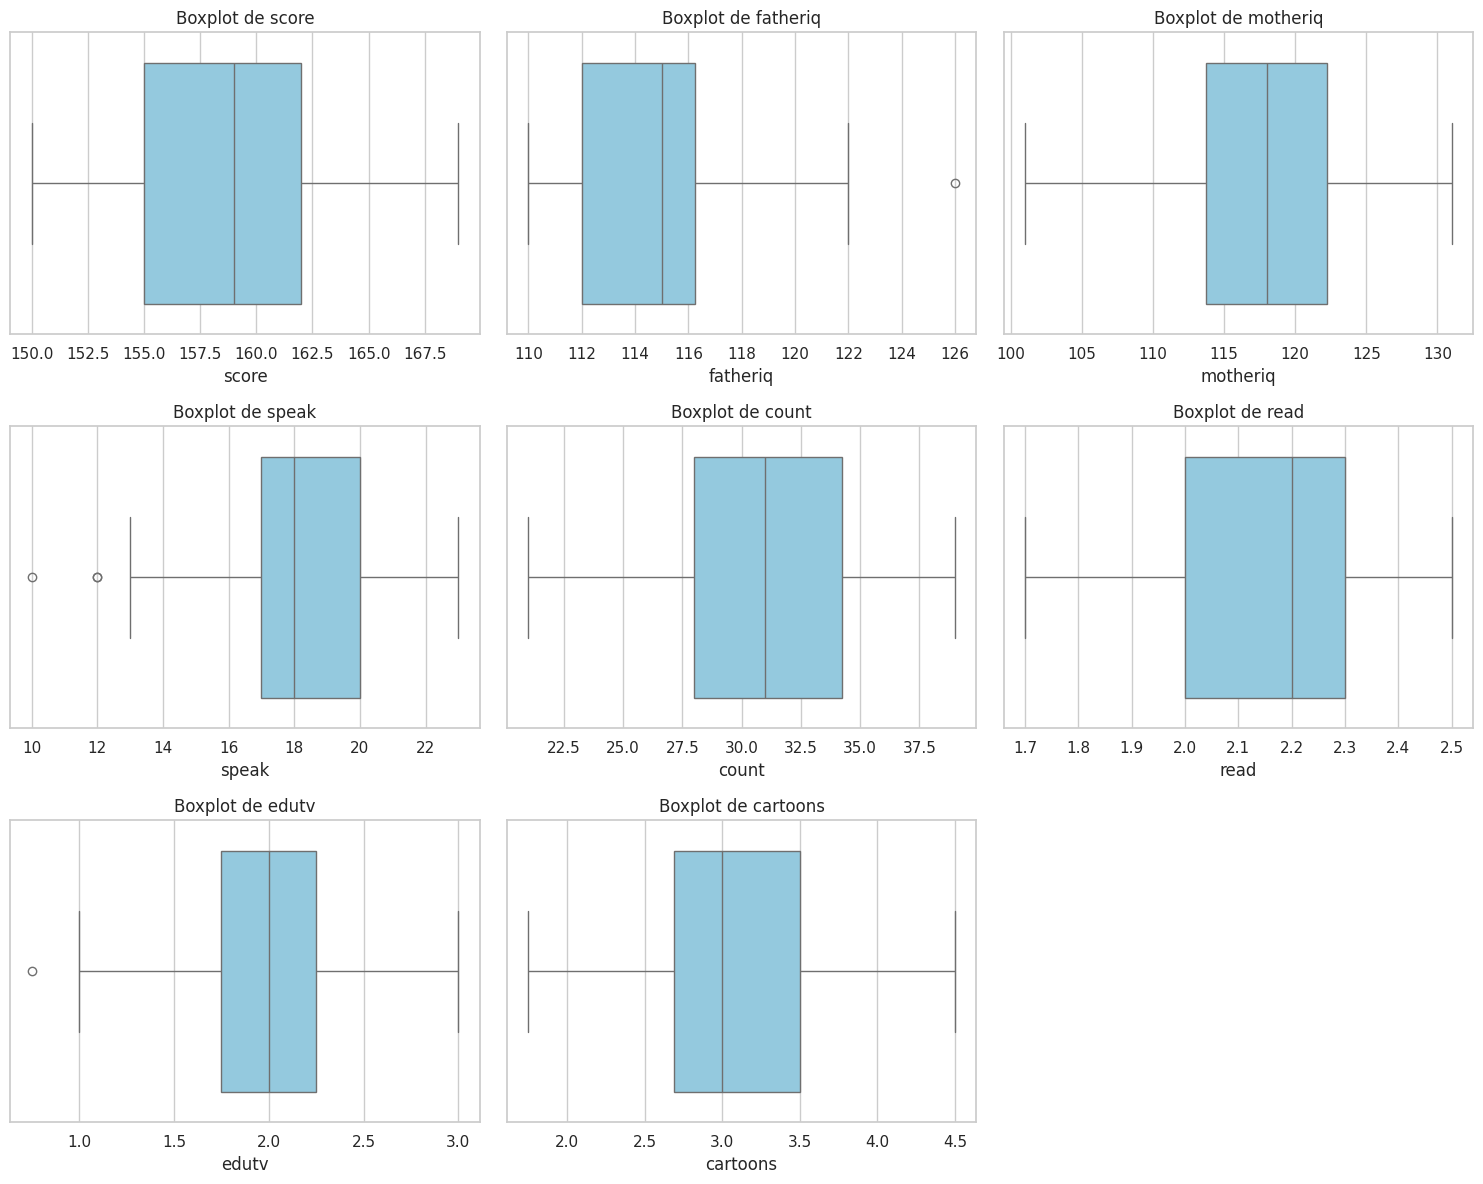

In [8]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

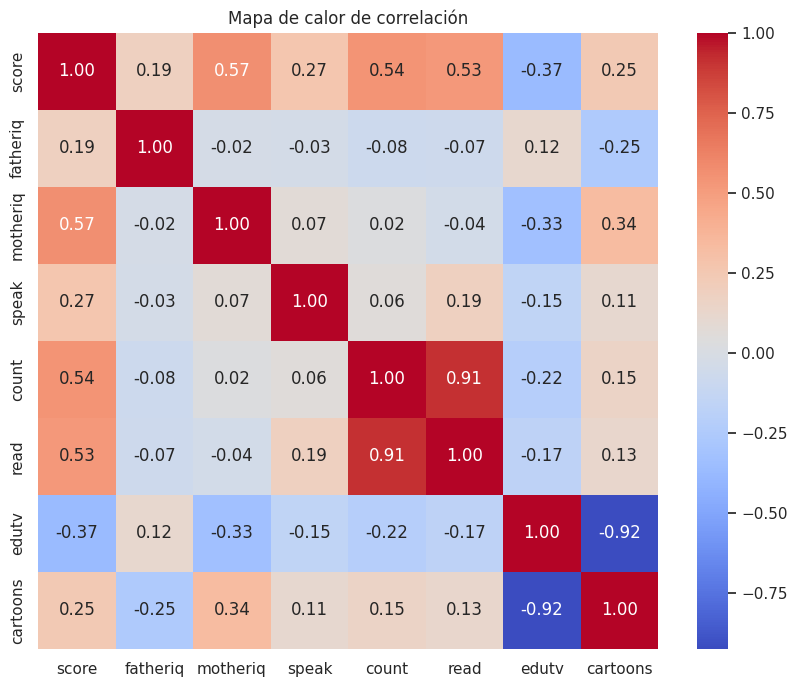

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

# **Conclusion del analisis visual**

A partir de los gráficos, se puede deducir que las variables read, count y motheriq están positivamente relacionadas con el score del niño, sugiriendo que el desarrollo verbal y el coeficiente intelectual de la madre influyen significativamente en su rendimiento. La fuerte correlación entre read y count indica que ambas podrían medir una dimensión similar del desarrollo cognitivo, mientras que la alta correlación negativa entre edutv y cartoons refleja una competencia directa por el tiempo de pantalla. Además, los boxplots revelan la presencia de algunos outliers en variables como speak, fatheriq y edutv, lo cual podría influir en futuros modelos si no se trata adecuadamente. En conjunto, los datos sugieren que el entorno intelectual y verbal del niño tiene mayor impacto que el contenido televisivo, y que ciertas variables podrían considerarse redundantes o poco relevantes para modelar el puntaje.